FELADAT

- <span style="color: var(--vscode-foreground);">Válassz ki egy olyan adatbázist a bit.uni-corvinus.hu-n, amelynek tartalmához hozzáférsz</span>
- Az adatbázison belül válassz ki egy táblát!
- Valósíts meg tipikus adatprofilozási lekérdezéseket a tábla legalább 2 oszlopára (min. 3 db / oszlop)!
- Pl: NULL értékek száma, százalékos aránya, legkisebb/legnagyobb érték, kiugró értékek, min/max/átlag, értékek eloszlása stb.
- A kapott eredményekhez diagramokat is készíthetsz
- Az megoldást ide töltsd fel csatolva, vagy GitHub-ra a repo link megadásával (utóbbi esetben +5%)
- A feladatot egyénileg kell megoldani!

SZÁLLÁSHELY TÁBLA szallas\_nev OSZLOPA

In [28]:
SELECT MIN(LEN(szallas_nev)) AS 'Legrövidebb név', 
       MAX(LEN(szallas_nev)) AS 'Leghosszabb név', 
       AVG(LEN(szallas_nev)) AS 'Átlag név hosszúság'

FROM szallashely
WHERE szallas_nev IS NOT NULL
AND LEN(SZALLAS_NEV) > 0

(1 row affected)

Total execution time: 00:00:00.014

Legrövidebb név,Leghosszabb név,Átlag név hosszúság
8,20,14


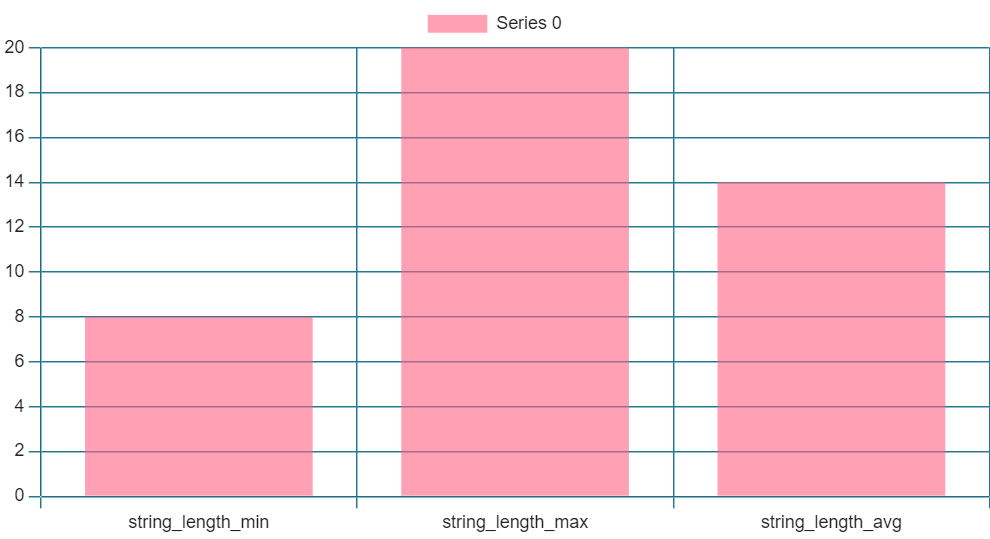

In [29]:
SELECT AVG(LEN(szallas_nev)) AS 'Átlag név hosszúság', 
       STDEV(LEN(szallas_nev)) AS 'Átlagtól eltérés', 
       VAR(LEN(szallas_nev)) AS 'Szórás'
FROM szallashely
WHERE szallas_nev IS NOT NULL
AND LEN(SZALLAS_NEV) > 0

(1 row affected)

Total execution time: 00:00:00.031

Átlag név hosszúság,Átlagtól eltérés,Szórás
14,"3,2630689615175217","10,647619047619036"


In [39]:
SELECT row_type, 
    SUM(row_count) AS 'row_count'
FROM
    (SELECT 
        CASE WHEN [value] IS NULL then 'NULL'
            WHEN row_count = 1 then 'Egyedi érték'
            ELSE 'Nem egyedi érték' 
            END AS row_type,
        row_count
    FROM (
        SELECT SZALLAS_NEV [value], 
            COUNT(*) row_count
        FROM szallashely
        GROUP BY SZALLAS_NEV) X) Y
GROUP BY row_type

(2 rows affected)

Total execution time: 00:00:00.026

row_type,row_count
Non Unique,6
Unique,15


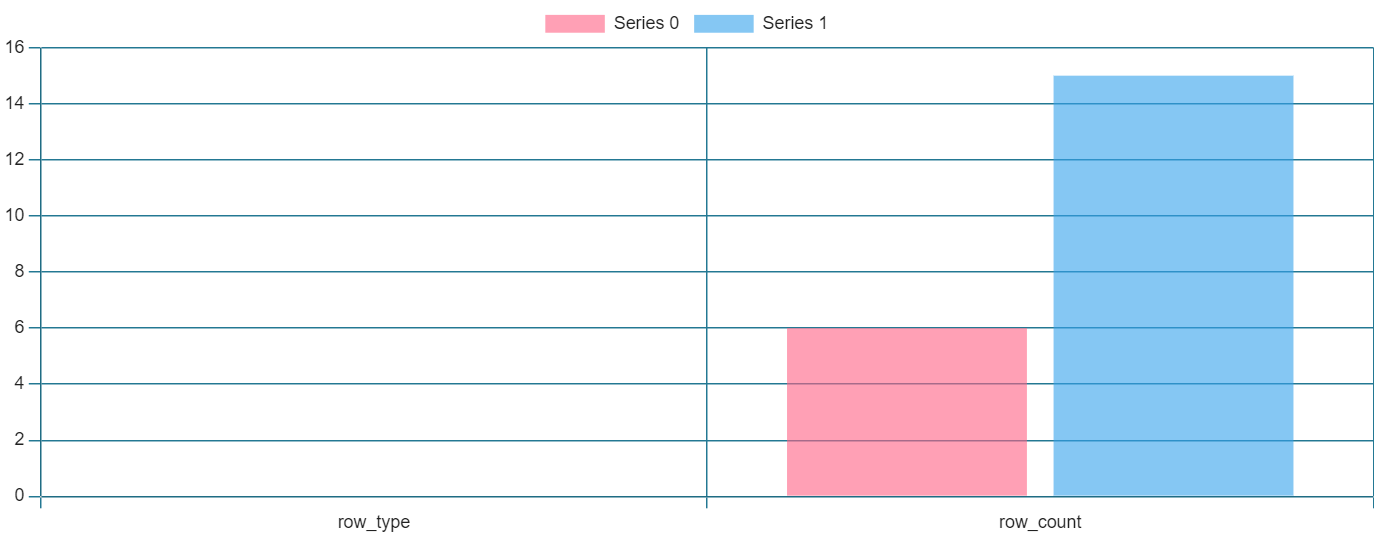

SZÁLLÁSHELY TÁBLA csillagok\_szama OSZLOPA

In [33]:
DECLARE 
@min int = 2,
@max int = 4;   

SELECT 
    SUM(CASE WHEN CSILLAGOK_SZAMA < @min THEN 1 ELSE 0 end) AS '2* alatt',
    SUM(CASE WHEN CSILLAGOK_SZAMA BETWEEN @min and @max THEN 1 ELSE 0 end) AS '2* és 4* között',
    SUM(CASE WHEN CSILLAGOK_SZAMA > @max THEN 1 ELSE 0 end) AS '4* felett'
FROM szallashely

(1 row affected)

Total execution time: 00:00:00.015

2* alatt,2* és 4* között,4* felett
10,11,0


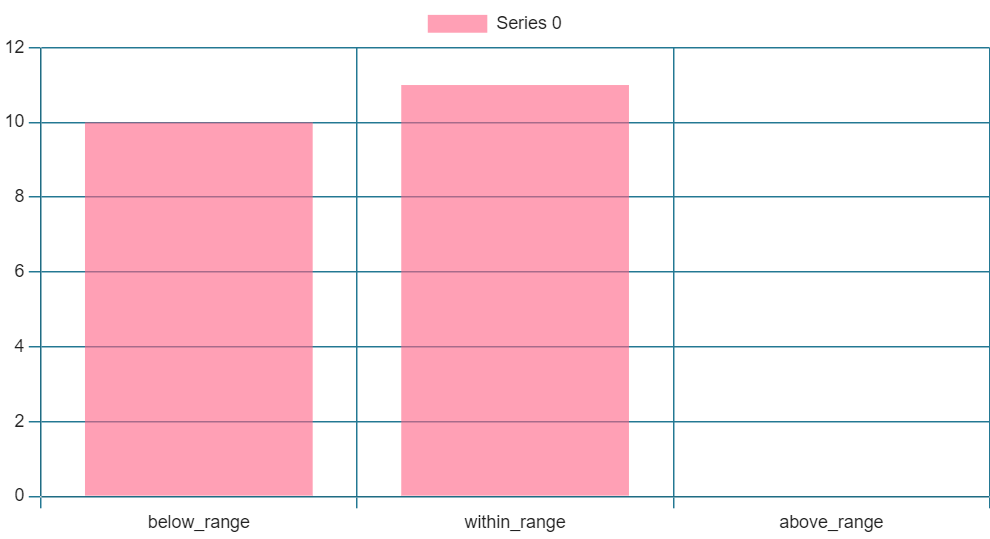

In [26]:
SELECT AVG(CSILLAGOK_SZAMA) AS 'Átlag értékelés',
        MIN(CSILLAGOK_SZAMA) AS 'Legkisebb értékelés',
        MAX(CSILLAGOK_SZAMA) AS 'Legnagyobb értékelés'
FROM Szallashely


(1 row affected)

Total execution time: 00:00:00.010

Átlag értékelés,Legkisebb értékelés,Legnagyobb értékelés
1,0,4


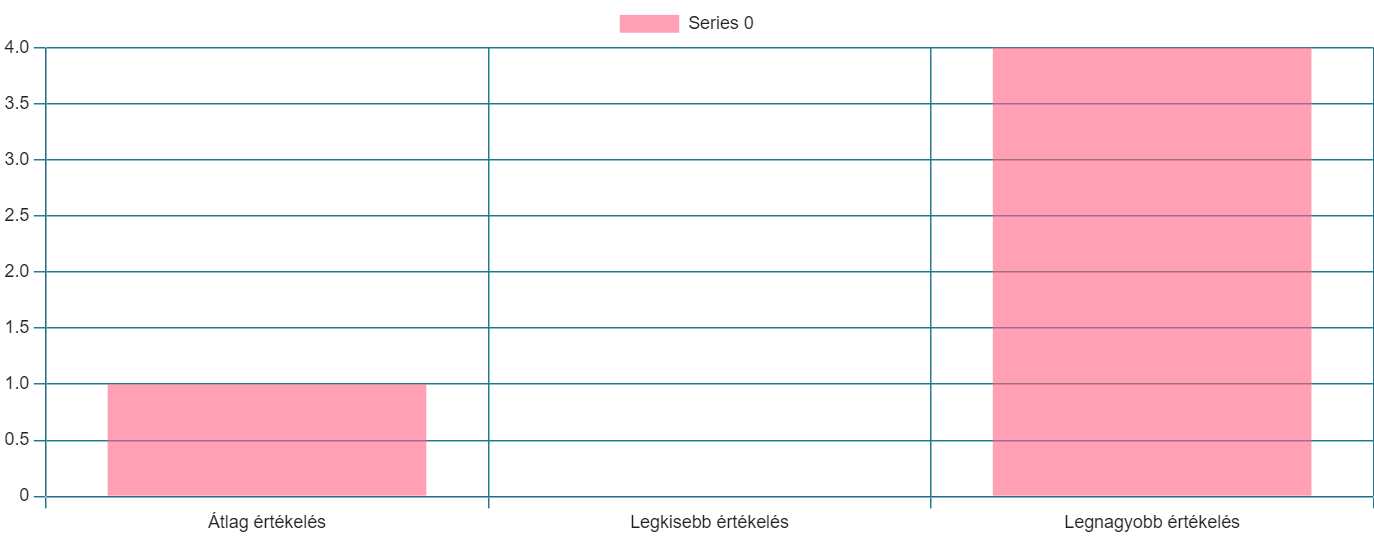

In [27]:
SELECT  STDEV(CSILLAGOK_SZAMA) AS 'Átlagtól eltérés', 
        VAR(CSILLAGOK_SZAMA) AS 'Szórás'
FROM Szallashely

(1 row affected)

Total execution time: 00:00:00.013

Átlagtól eltérés,Szórás
"1,7071279138616748","2,914285714285714"


SZÁLLÁSHELY TÁBLA RÖGZ\_IDŐ OSZLOPA

In [37]:
SELECT row_type, 
    SUM(row_count) AS 'row_count'
FROM
    (SELECT 
        CASE WHEN [value] IS NULL then 'NULL'
            WHEN row_count = 1 then 'Egyedi érték'
            ELSE 'Nem egyedi érték' 
            END AS row_type,
        row_count
    FROM (
        SELECT ROGZ_IDO [value], 
            COUNT(*) row_count
        FROM szallashely
        GROUP BY ROGZ_IDO) X) Y
GROUP BY row_type

(2 rows affected)

Total execution time: 00:00:00.030

row_type,row_count
Non Unique,8
Unique,13


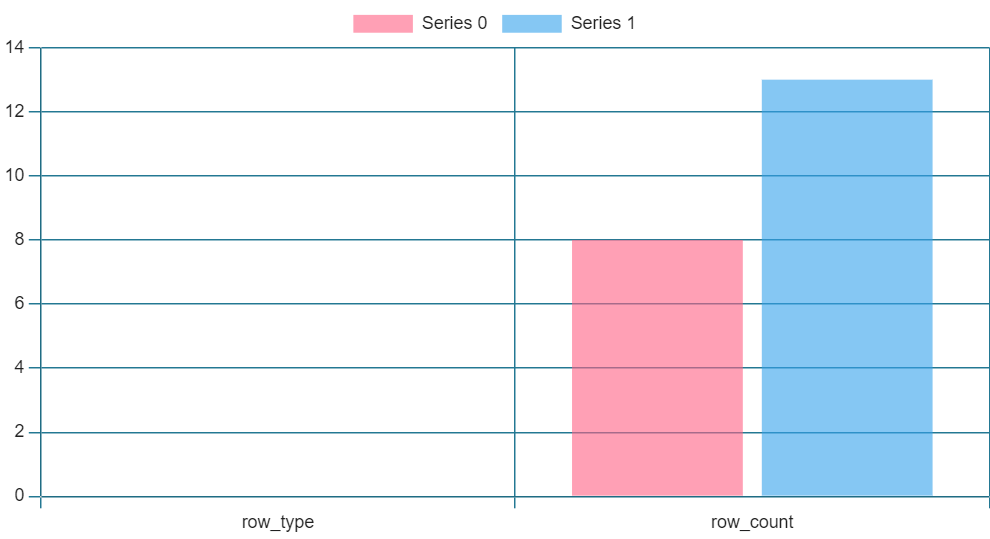

In [42]:
SELECT row_type,
    COUNT(*) row_count
FROM 
    (SELECT 
        CASE WHEN ROGZ_IDO IS NULL THEN 'Null'
            ELSE 'Nem üres' 
            END AS row_type
        FROM szallashely) rows
GROUP BY row_type

(1 row affected)

Total execution time: 00:00:00.028

row_type,row_count
Nem üres,21


In [41]:
SELECT MIN(ROGZ_IDO) as 'Legkorábban rögzített',
        MAX(ROGZ_IDO) as 'Legkésőbb rögzített'
FROM szallashely

(1 row affected)

Total execution time: 00:00:00.008

Legkorábban rögzített,Legkésőbb rögzített
2016-02-28,2016-04-07


In [16]:
SELECT*
from szallashely


(21 rows affected)

Total execution time: 00:00:00.082

SZALLAS_ID,SZALLAS_NEV,HELY,CSILLAGOK_SZAMA,TIPUS,ROGZITETTE,ROGZ_IDO,CIM
1,Sába-Ház,Balaton-dél,0,vendégház,Béla,2016-02-28,"8630 Balatonboglár, Radnóti Miklós utca 8"
2,Családi Ház,Balaton-dél,0,vendégház,Béla,2016-03-02,"8630 Balatonboglár, József Attila utca 25"
3,Fortuna Apartman,Hajdúbihar megye,0,Apartman,Sára,2016-03-06,"4200 Hajdúszoboszló, Wesselényi utca 56."
4,Fortuna panzió,Budapest,3,panzió,Béla,2016-03-07,1019 Budapest XIV. Cinkotai út 86.
5,Fortuna Panzió,Békés megye,3,panzió,Sára,2016-03-08,"5900 Orosháza, Gyopárosfürdő Tópart utca 3."
6,Kentaur Hotel,Balaton-dél,3,Hotel,Béla,2016-03-08,"8600 Siófok (Széplak), Akácfa utca 1"
7,Szieszta Apartmanház,Balaton-dél,0,Apartman,Mari,2016-03-11,"8630 Balatonboglár, Dózsa György utca 108"
8,Hotel Három Hattyú,Balaton-dél,4,Hotel,Béla,2016-03-13,"8623 Balatonföldvár, Rákóczi Ferenc út 45."
9,Jáde panzió,Balaton-dél,3,panzió,Mari,2016-03-16,"8624 Balatonföldvár, Kiss u.2."
10,Lagúna Hotel,Budapest,4,Hotel,Sára,2016-03-20,"1097 Budapest, Albert Flórián út 3"
